In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

DATA_PATH = "../data/raw/dataset.csv"

In [2]:
data = pd.read_csv(DATA_PATH).iloc[:, 1:] # exclude the first column as it is the index

In [3]:
data

,gene_id,transcript_id,transcript_position,k_mer,left_dwell,left_std,left_mean,mid_dwell,mid_std,mid_mean,right_dwell,right_std,right_mean,label
0,ENSG00000004059,ENST00000000233,244,AAGACCA,0.003,2.060,125.000,0.018,10.400,122.000,0.009,10.900,84.100,0
1,ENSG00000004059,ENST00000000233,244,AAGACCA,0.006,2.530,125.000,0.008,4.670,126.000,0.010,6.300,80.900,0
2,ENSG00000004059,ENST00000000233,244,AAGACCA,0.005,3.920,109.000,0.014,12.000,124.000,0.005,2.130,79.600,0
3,ENSG00000004059,ENST00000000233,244,AAGACCA,0.004,2.060,125.000,0.008,5.010,130.000,0.005,3.780,80.400,0
4,ENSG00000004059,ENST00000000233,244,AAGACCA,0.007,2.920,120.000,0.003,3.940,129.000,0.013,7.150,82.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027101,ENSG00000167747,ENST00000641834,1693,TTGACAT,0.004,7.490,108.000,0.006,10.200,116.000,0.010,2.010,76.400,0
11027102,ENSG00000167747,ENST00000641834,1693,TTGACAT,0.007,1.910,109.000,0.006,12.300,110.000,0.018,2.610,74.600,0
11027103,ENSG00000167747,ENST00000641834,1693,TTGACAT,0.007,4.580,105.000,0.004,6.580,113.000,0.003,2.280,85.300,0
11027104,ENSG00000167747,ENST00000641834,1693,TTGACAT,0.003,2.330,109.000,0.009,10.400,108.000,0.007,4.440,76.800,0


# Task 1: How Imbalanced is the Dataset?

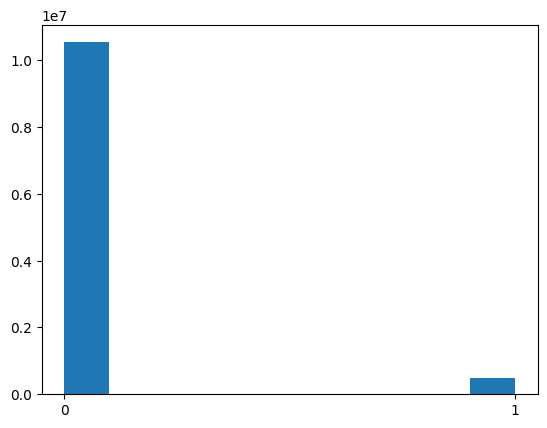

We have 10527532 datapoints (95.47%) with label 0
We have 499574 datapoints (4.53%) with label 1


In [4]:
counts, edges, bars = plt.hist(data.loc[:, "label"])
plt.xticks([0,1])
plt.show()
print(f"We have {int(counts[0])} datapoints ({round(100*counts[0]/sum(counts), 2)}%) with label 0")
print(f"We have {int(counts[-1])} datapoints ({round(100*counts[-1]/sum(counts), 2)}%) with label 1")

In [5]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

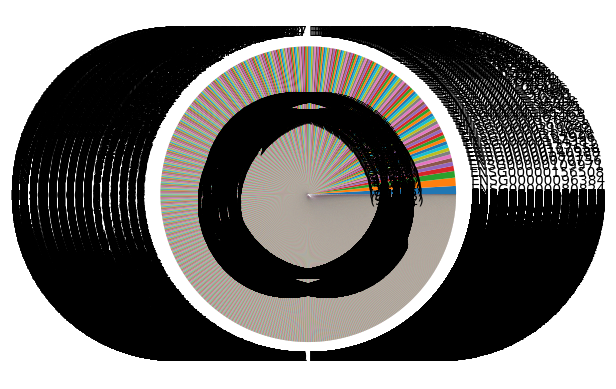

In [6]:
label0_gene_counts = data.loc[data.label == 0, "gene_id"].value_counts()
plt.pie(label0_gene_counts, labels = label0_gene_counts.index, autopct=autopct_format(label0_gene_counts))
plt.show()

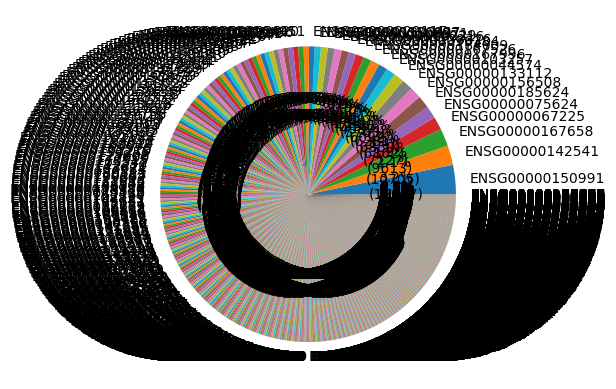

In [7]:
label1_gene_counts = data.loc[data.label == 1, "gene_id"].value_counts()
plt.pie(label1_gene_counts, labels = label1_gene_counts.index, autopct=autopct_format(label1_gene_counts))
plt.show()

# Task 2: What is the spread of data in each column?

### Only filter for healthy reads because we expect unhealthy reads to have drastically different data distributions

In [8]:
data.loc[(data.label == 0), ['left_dwell' , 'left_std' , 'left_mean', 
                             'mid_dwell'  , 'mid_std'  , 'mid_mean' ,
                             'right_dwell', 'right_std', 'right_mean']].\
     describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95])

,left_dwell,left_std,left_mean,mid_dwell,mid_std,mid_mean,right_dwell,right_std,right_mean
count,10527532.000,10527532.000,10527532.000,10527532.000,10527532.000,10527532.000,10527532.000,10527532.000,10527532.000
mean,0.008,4.333,110.644,0.008,5.183,110.874,0.007,2.978,86.206
std,0.005,2.578,11.998,0.005,3.018,13.078,0.004,1.700,5.557
min,0.002,0.094,73.200,0.002,0.044,75.400,0.002,0.136,61.000
5%,0.003,1.550,88.700,0.003,1.860,92.800,0.003,1.360,77.300
25%,0.004,2.490,104.000,0.004,2.920,98.600,0.004,1.930,81.900
50%,0.007,3.540,110.000,0.007,4.220,111.000,0.006,2.510,86.400
75%,0.010,5.540,120.000,0.010,6.900,123.000,0.009,3.460,90.400
95%,0.019,9.650,129.000,0.018,11.200,130.000,0.015,6.270,95.000
max,0.120,206.000,153.000,0.138,206.000,156.000,0.103,184.000,143.000


<Figure size 2000x2000 with 0 Axes>

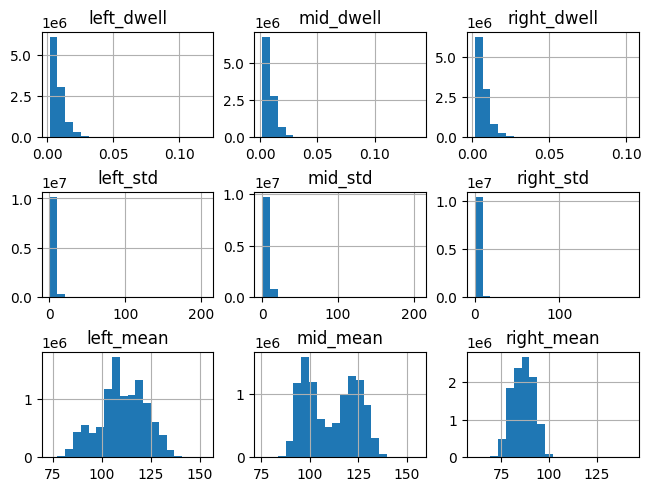

In [9]:
plt.figure(figsize=(20, 20))
fig, axis = plt.subplots(3, 3, layout="constrained")

# Create histogram for each column in DataFrame
data.loc[(data.label == 0), ['left_dwell' , 'mid_dwell' , 'right_dwell', 
                             'left_std'  , 'mid_std'  , 'right_std' ,
                             'left_mean', 'mid_mean', 'right_mean']].hist(ax=axis, bins=20)
plt.show()

### Only filter for reads with m6A modifications to see if these have drastically different data distributions from healthy reads

In [10]:
data.loc[(data.label == 1), ['left_dwell' , 'left_std' , 'left_mean', 
                             'mid_dwell'  , 'mid_std'  , 'mid_mean' ,
                             'right_dwell', 'right_std', 'right_mean']].\
     describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95])

,left_dwell,left_std,left_mean,mid_dwell,mid_std,mid_mean,right_dwell,right_std,right_mean
count,499574.000,499574.000,499574.000,499574.000,499574.000,499574.000,499574.000,499574.000,499574.000
mean,0.008,4.643,116.352,0.008,5.178,115.466,0.007,3.042,87.265
std,0.006,2.554,8.674,0.005,2.794,11.053,0.005,1.686,5.440
min,0.002,0.236,77.000,0.002,0.225,82.500,0.002,0.220,65.700
5%,0.003,1.700,99.900,0.003,1.880,95.900,0.003,1.350,77.200
25%,0.004,2.700,112.000,0.005,3.050,106.000,0.004,1.940,83.800
50%,0.007,3.970,117.000,0.007,4.510,118.000,0.006,2.590,88.100
75%,0.011,6.080,121.000,0.011,6.720,124.000,0.009,3.620,91.000
95%,0.019,9.660,130.000,0.019,10.600,130.000,0.016,6.280,95.200
max,0.089,185.000,148.000,0.097,124.000,147.000,0.078,83.100,129.000


<Figure size 2000x2000 with 0 Axes>

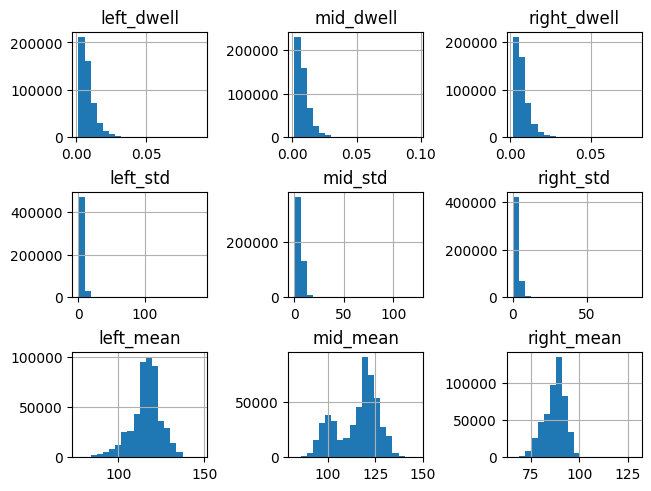

In [11]:
plt.figure(figsize=(20, 20))
fig, axis = plt.subplots(3, 3, layout="constrained")

# Create histogram for each column in DataFrame
data.loc[(data.label == 1), ['left_dwell' , 'mid_dwell' , 'right_dwell', 
                             'left_std'  , 'mid_std'  , 'right_std' ,
                             'left_mean', 'mid_mean', 'right_mean']].hist(ax=axis, bins=20)
plt.show()

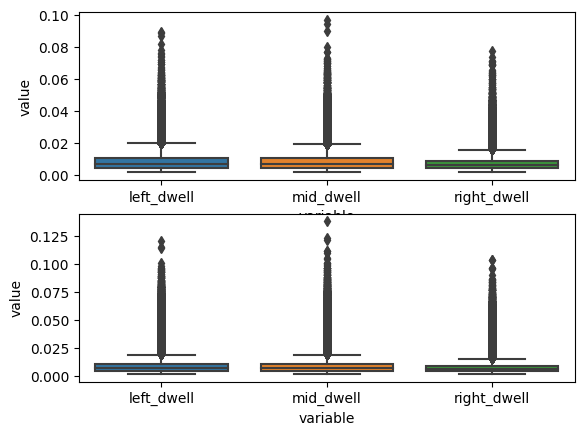

In [12]:
fig, axes = plt.subplots(2)

sns.boxplot(data = 
            data.loc[data.label == 1, 
                     ['left_dwell' , 'mid_dwell' , 'right_dwell']].melt(), 
            x = 'variable', 
            y = 'value',
            ax=axes[0])

sns.boxplot(data = 
            data.loc[data.label == 0, 
                     ['left_dwell' , 'mid_dwell' , 'right_dwell']].melt(), 
            x = 'variable', 
            y = 'value',
            ax=axes[1])

plt.show()

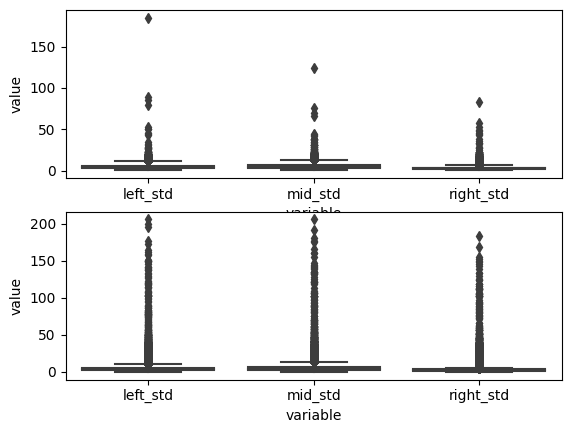

In [13]:
fig, axes = plt.subplots(2)

sns.boxplot(data = 
            data.loc[data.label == 1, 
                     ['left_std'  , 'mid_std'  , 'right_std']].melt(), 
            x = 'variable', 
            y = 'value',
            ax=axes[0])

sns.boxplot(data = 
            data.loc[data.label == 0, 
                     ['left_std'  , 'mid_std'  , 'right_std']].melt(), 
            x = 'variable', 
            y = 'value',
            ax=axes[1])

plt.show()

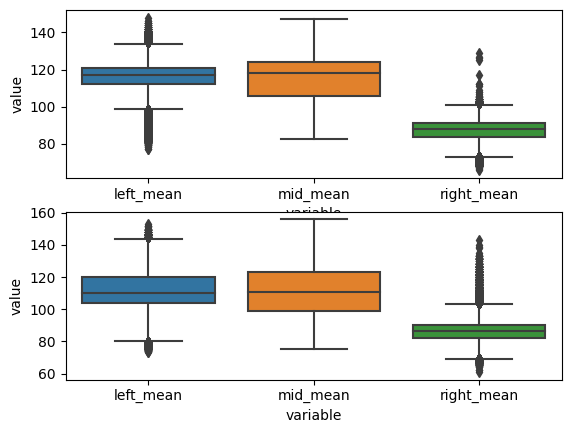

In [14]:
fig, axes = plt.subplots(2)

sns.boxplot(data = 
            data.loc[data.label == 1, 
                     ['left_mean', 'mid_mean', 'right_mean']].melt(), 
            x = 'variable', 
            y = 'value',
            ax=axes[0])

sns.boxplot(data = 
            data.loc[data.label == 0, 
                     ['left_mean', 'mid_mean', 'right_mean']].melt(), 
            x = 'variable', 
            y = 'value',
            ax=axes[1])

plt.show()

# Task 3: How many rows of each gene do we have?

In [15]:
gene_counts = data.loc[:, "gene_id"].value_counts().reset_index()
gene_counts.rename(columns = {
    "gene_id" : "counts",
    "index" : "gene_id"
}, inplace=True)
gene_counts["percentage (%)"] = gene_counts.counts * 100 / sum(gene_counts.counts)
gene_counts

,gene_id,counts,percentage (%)
0,ENSG00000096384,98692,0.895
1,ENSG00000080824,95522,0.866
2,ENSG00000156508,82712,0.750
3,ENSG00000109971,62722,0.569
4,ENSG00000167658,50055,0.454
...,...,...,...
3847,ENSG00000214413,20,0.000
3848,ENSG00000168061,20,0.000
3849,ENSG00000153015,20,0.000
3850,ENSG00000175707,20,0.000


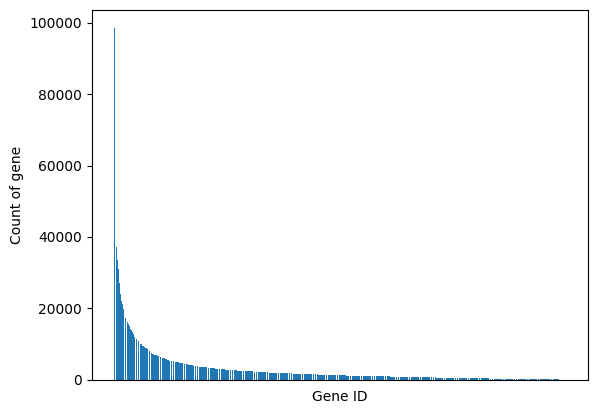

In [16]:
plt.bar(x = gene_counts.gene_id, height = gene_counts.counts)
plt.ylabel("Count of gene")
plt.xlabel("Gene ID")
plt.xticks([])
plt.show()